# **Omdena TrashOut - Task0 Explanatory Data Analysis (EDA)**

*by Simone Vaccari*




# Set-up

## Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Change Working Directory 

In [ ]:
cd /content/drive/My Drive/Omdena

/content/drive/My Drive/Omdena


# Read CSVs Data (ALL at once)
All the csv files are in the "/content/drive/My Drive/Omdena/Data" folder

In [ ]:
import pandas as pd
import os

In [ ]:
!pip install geopandas

     |████████████████████████████████| 962kB 2.5MB/s 
     |████████████████████████████████| 14.7MB 295kB/s 
     |████████████████████████████████| 10.9MB 40.4MB/s 


In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

"""
NB the following does NOT contain europe_1 and europe_8 for the problems outlined below. If someone has a working solution or has manually corrected the two CSV files, please share

There are rows in the europe_1 and europe_8 that have been misplaced from previous row(s) and therefore have wrong values across each field (error as string "stillHere" in Lat values). These lines start ";http..."
"""

continents = ['africa_0.csv', 'africa_1.csv', 'asia_0.csv', 'southamerica_0.csv', 'northamerica_0.csv', 'northamerica_1.csv', 'oceania_0.csv', 'australia_0.csv',
              'europe_0.csv', 'europe_2.csv', 'europe_3.csv', 'europe_4.csv', 'europe_5.csv', 'europe_6.csv', 'europe_7.csv']
#              'europe_0.csv', 'europe_1.csv', 'europe_2.csv', 'europe_3.csv', 'europe_4.csv', 'europe_5.csv', 'europe_6.csv', 'europe_7.csv', 'europe_8.csv']

world_combined = pd.concat([pd.read_csv('Data/'+f, error_bad_lines=False, sep=';') for f in continents])
print(world_combined.dtypes)

geometry = [Point(xy) for xy in zip(world_combined['longitude'], world_combined['latitude'])]
print(geometry)

print(world_combined.shape)
world_combined.head()

id                 int64
latitude         float64
longitude        float64
continent         object
country           object
aa1               object
aa2               object
aa3               object
locality          object
subLocality       object
types             object
updateTime        object
updateNeeded        bool
note              object
url               object
status            object
size              object
anonymous           bool
created           object
accessibility     object
image             object
dtype: object
[<shapely.geometry.point.Point object at 0x7f1b3f8f0d68>, <shapely.geometry.point.Point object at 0x7f1b3f8f0cf8>, <shapely.geometry.point.Point object at 0x7f1b3f8f0c50>, <shapely.geometry.point.Point object at 0x7f1b3f8f0c88>, <shapely.geometry.point.Point object at 0x7f1b3f8f0b70>, <shapely.geometry.point.Point object at 0x7f1b3f8f0ba8>, <shapely.geometry.point.Point object at 0x7f1b3f8f0c18>, <shapely.geometry.point.Point object at 0x7f1b3f8f0da0>, <sha

id  ...                                              image
0  57838  ...  https://firebasestorage.googleapis.com/v0/b/tr...
1  57837  ...  https://firebasestorage.googleapis.com/v0/b/tr...
2  57836  ...  https://firebasestorage.googleapis.com/v0/b/tr...
3  57831  ...  https://firebasestorage.googleapis.com/v0/b/tr...
4  57830  ...  https://firebasestorage.googleapis.com/v0/b/tr...

[5 rows x 21 columns]

# Statistics

In [ ]:
# List of Features
world_combined.columns

Index(['id', 'latitude', 'longitude', 'continent', 'country', 'aa1', 'aa2',
       'aa3', 'locality', 'subLocality', 'types', 'updateTime', 'updateNeeded',
       'note', 'url', 'status', 'size', 'anonymous', 'created',
       'accessibility', 'image'],
      dtype='object')

In [ ]:
#Missing percentage of column accessibility
missing = world_combined[world_combined['accessibility'].isnull()]
missing_perc = len(missing) / len(world_combined) * 100
print('Missing Total: {}\nMissing Percentage of column accessibility: {:.2f}%'.format(len(missing), missing_perc))

#Missing percentage of column aa3
missing = world_combined[world_combined['aa3'].isnull()]
missing_perc = len(missing) / len(world_combined) * 100
print('Missing Total: {}\nMissing Percentage of column aa3: {:.2f}%'.format(len(missing), missing_perc))

Missing Total: 41191
Missing Percentage of column accessibility: 84.82%
Missing Total: 43756
Missing Percentage of column aa3: 90.10%


In [ ]:
print(world_combined.shape)
#dropping duplicate rows
world_combined = world_combined.drop_duplicates(subset=world_combined.columns,keep='first')
print(world_combined.shape)
world_combined.head()


(48562, 21)
(48562, 21)


id  ...                                              image
0  57838  ...  https://firebasestorage.googleapis.com/v0/b/tr...
1  57837  ...  https://firebasestorage.googleapis.com/v0/b/tr...
2  57836  ...  https://firebasestorage.googleapis.com/v0/b/tr...
3  57831  ...  https://firebasestorage.googleapis.com/v0/b/tr...
4  57830  ...  https://firebasestorage.googleapis.com/v0/b/tr...

[5 rows x 21 columns]

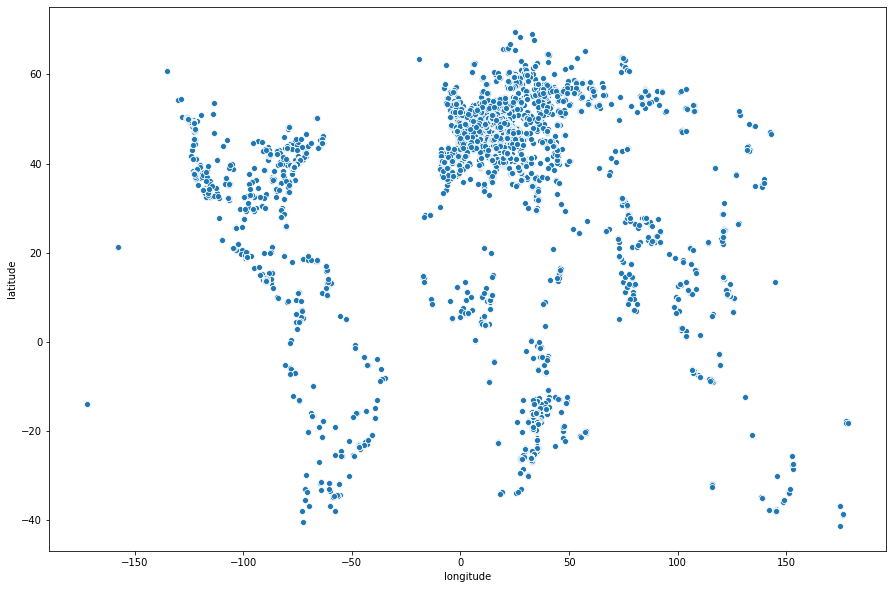

In [ ]:
#scatterplot to visualize our geospatial data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,10))
sns.scatterplot(world_combined['longitude'], world_combined['latitude'])

In [ ]:
# Info on Features
world_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48562 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48562 non-null  int64  
 1   latitude       48562 non-null  float64
 2   longitude      48562 non-null  float64
 3   continent      48513 non-null  object 
 4   country        48513 non-null  object 
 5   aa1            44595 non-null  object 
 6   aa2            38860 non-null  object 
 7   aa3            4806 non-null   object 
 8   locality       38807 non-null  object 
 9   subLocality    15898 non-null  object 
 10  types          48554 non-null  object 
 11  updateTime     48562 non-null  object 
 12  updateNeeded   48562 non-null  bool   
 13  note           12012 non-null  object 
 14  url            48562 non-null  object 
 15  status         48562 non-null  object 
 16  size           48562 non-null  object 
 17  anonymous      48562 non-null  bool   
 18  created

In [ ]:
# Continents statistics by Continent
world_combined['continent'].value_counts()

Europe           34955
North America     6353
Africa            5324
Asia              1512
South America      271
Australia           87
Oceania             11
Name: continent, dtype: int64

In [ ]:
# Overview of unique values in a field
set(world_combined['types'])

{nan,
 'construction,glass,electronic,domestic,metal,plastic',
 'domestic,dangerous,electronic',
 'construction,plastic,glass,metal,domestic',
 'glass,metal,domestic,dangerous,liquid,plastic',
 'glass,metal,deadAnimals,liquid,plastic,domestic',
 'dangerous,glass,electronic,plastic',
 'automotive,metal,plastic,glass,electronic,construction,dangerous',
 'liquid,glass,metal,organic,plastic,construction,domestic',
 'plastic,automotive,dangerous,liquid,metal,electronic,construction,glass,domestic',
 'metal,glass,electronic,domestic,construction,plastic',
 'domestic,metal,glass,plastic,construction',
 'glass,construction,electronic',
 'automotive,liquid,metal',
 'automotive,construction,plastic,domestic',
 'automotive,construction',
 'automotive,dangerous,metal,plastic,liquid,glass,electronic,domestic,construction',
 'liquid,glass,deadAnimals,metal,plastic',
 'metal,glass,domestic,construction,plastic',
 'deadAnimals,dangerous,organic,plastic,domestic',
 'construction,domestic,metal,plastic'

In [ ]:
world_combined['size'].value_counts()

car            22052
wheelbarrow    14721
bag            11789
Name: size, dtype: int64

In [ ]:
# Select only large dumpsites (size classified as 'car')
wc_car = world_combined[world_combined['size'] == 'car']
print(wc_car.shape)

(22052, 21)


In [ ]:
wc_car

id  ...                                              image
0     57838  ...  https://firebasestorage.googleapis.com/v0/b/tr...
1     57837  ...  https://firebasestorage.googleapis.com/v0/b/tr...
2     57836  ...  https://firebasestorage.googleapis.com/v0/b/tr...
3     57831  ...  https://firebasestorage.googleapis.com/v0/b/tr...
4     57830  ...  https://firebasestorage.googleapis.com/v0/b/tr...
...     ...  ...                                                ...
4993   2933  ...  https://storage.googleapis.com/trashoutngo-dev...
4994   2932  ...  https://storage.googleapis.com/trashoutngo-dev...
4996   2930  ...  https://storage.googleapis.com/trashoutngo-dev...
4997   2929  ...  https://storage.googleapis.com/trashoutngo-dev...
4999   2927  ...  https://storage.googleapis.com/trashoutngo-dev...

[22052 rows x 21 columns]

In [ ]:
world_db = wc_car

In [ ]:
wc_simple = world_db.drop(['aa1','aa2','aa3','updateNeeded','note','anonymous'], 1)
wc_simple.head()

id  ...                                              image
0  57838  ...  https://firebasestorage.googleapis.com/v0/b/tr...
1  57837  ...  https://firebasestorage.googleapis.com/v0/b/tr...
2  57836  ...  https://firebasestorage.googleapis.com/v0/b/tr...
3  57831  ...  https://firebasestorage.googleapis.com/v0/b/tr...
4  57830  ...  https://firebasestorage.googleapis.com/v0/b/tr...

[5 rows x 15 columns]

# Maps

## Static Map


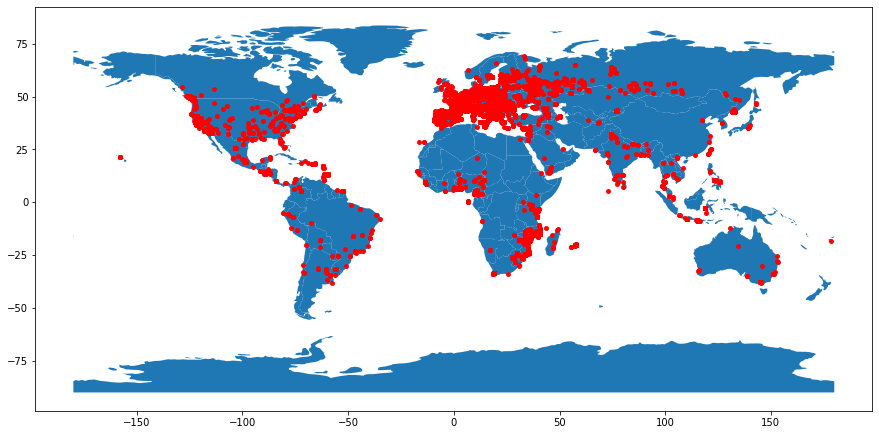

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(world_db['longitude'], world_db['latitude'])]

gdf = GeoDataFrame(world_db, geometry=geometry) 

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 10)), marker='o', color='red', markersize=15);

## Interactive Map

In [ ]:
# Mapping with Folium
import folium

In [ ]:
# Map with FastMarkerCluster
from folium.plugins import FastMarkerCluster

map = folium.Map(location=[0, 0], zoom_start=2)

callback = ('function (row) {' 
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "red",  radius: 10000});'
                'return circle};')

map.add_child(FastMarkerCluster(world_combined[['latitude', 'longitude']].values.tolist(), callback=callback))
map

In [ ]:
# Mapping Markers
""" NB THIS IS SLOW/NOT EFFICIENT. ONLY WORKS WELL WITH <1000 POINTS OR SO
map = folium.Map(location=[0, 0], zoom_start=2)
for i in range(0,500): # only plot the first 500 locations
  folium.Marker([world_combined.iloc[i]['latitude'], world_combined.iloc[i]['longitude']]).add_to(map)#, popup=df_counters['Name'][point]).add_to(map)
map"""

# Access Pictures

In [ ]:
# Function to extract the first N of images of a specific type (eg 'plastic') from the urls 
def plot_images(df,number):
    """dataframe and number of images"""
    import urllib
    from IPython.display import Image 

    # List of file names 
    names = []

    for i in range(number):
        name, header = urllib.request.urlretrieve(df['image'].iloc[i])

        names.append(name)

    # images = [cv2.imread(img) for img in names]

    for file in names:
        img=plt.imread(file)
        imgplot = plt.imshow(img)
        plt.show()

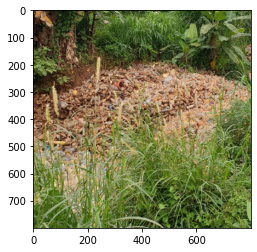

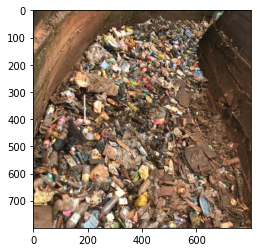

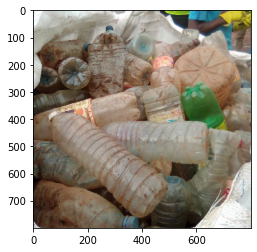

In [ ]:
import matplotlib.pyplot as plt
wc_simple_plastic = wc_simple[wc_simple['types']=='plastic']

plot_images(wc_simple_plastic,3)


In [ ]:
wc_simple.iloc[3]
img = wc_simple.iloc[3].image
print(img)

https://firebasestorage.googleapis.com/v0/b/trashoutngo-dev.appspot.com/o/temp-images%2F812afbcf-d899-44b5-9edb-537c2c73f3df?alt=media&token=8fd920ab-823d-456a-baed-0c5f901b38a4


# External Datasets

## DEM and Slope

In [ ]:
# Installs geemap package
import subprocess

try:
    import geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])

# Checks whether this notebook is running on Google Colab
try:
    import google.colab
    import geemap.eefolium as emap
except:
    import geemap as emap

# Authenticates and initializes Earth Engine
import ee

try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()  

In [ ]:
Map = emap.Map(center=(40, -100), zoom=4)
Map

In [ ]:
# Add Earth Engine dataset
dem = ee.Image("USGS/SRTMGL1_003")

# Set visualization parameters.
vis_params = {'min': 0, 'max': 4000, 'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']} # palette for DEM

# Add Slope 
slope = ee.Terrain.slope(dem); #print(slope.getInfo())
slope_mask = slope.lt(30) 

vis_param_slope = {'bands': 'slope', 'min': 0, 'max': 30, 'palette': ['green', 'yellow', 'red']}

"""
# Print the elevation of Mount Everest.
xy = ee.Geometry.Point([86.9250, 27.9881])
everest = xy.getInfo()['coordinates'][1], xy.getInfo()['coordinates'][0]
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)
Map = emap.Map(center=everest, zoom=4)
"""
# Add Earth Engine layers to Map
Map = emap.Map(center=[0,0], zoom=4)
Map.addLayer(dem, vis_params, 'SRTM DEM', True, 0.5)
Map.addLayer(slope.updateMask(slope_mask), vis_param_slope, 'SRTM Slope', True, 0.5)
Map.addLayerControl()
Map

## Cities

In [ ]:
import geemap.eefolium as geemap
Map_C = geemap.Map()
Map_C

In [ ]:
#cities_shp = 'Data/World_Cities/World_Cities.shp'
#cities = geemap.shp_to_ee(cities_shp)

#Map_C.addLayer(cities, {}, 'World Cities')
#Map_C

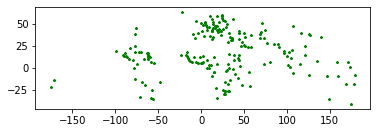

In [ ]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities_db.head()

cities.plot(marker='*', color='green', markersize=5);

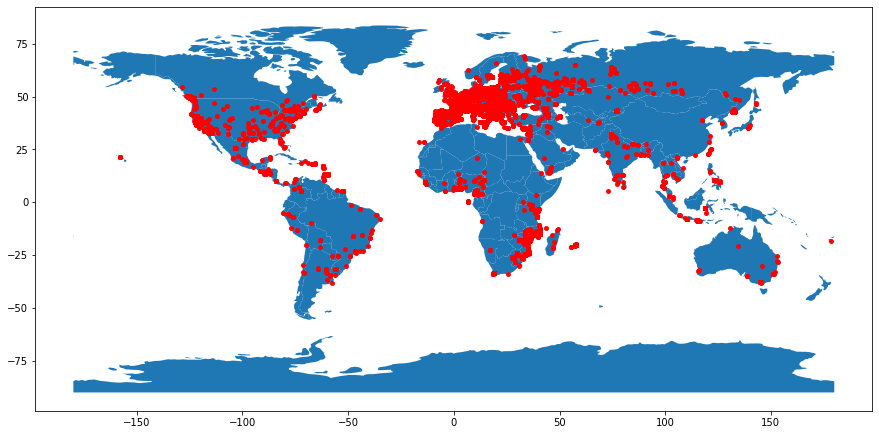

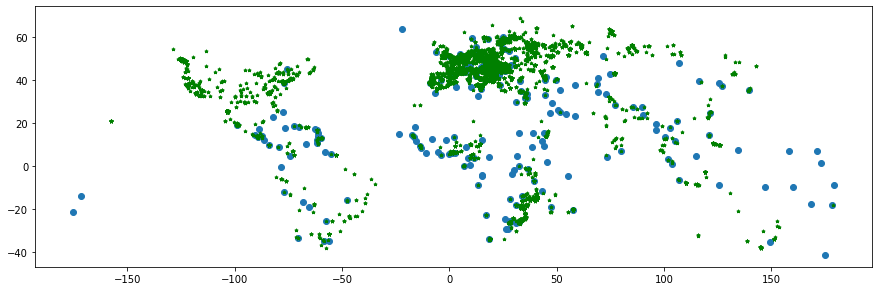

In [ ]:
gdf.plot(ax=world.plot(figsize=(15, 10)), marker='o', color='red', markersize=15);
gdf.plot(ax=cities.plot(figsize=(15, 10)), marker='*', color='green', markersize=10);